# NATS3200: Practical 4 (Multiple linear regression and model selection, weeks 4 and 5) 

### William Makins-Elliott 201447107

imports + file opening:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import glm
from scipy.stats import norm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split 
import scipy.stats
from collections import Counter

medalsdf = pd.read_csv('Medals.csv') #reads the file and generates a pandas dataframe.
print(medalsdf)

          Country       GDP  Population  Medal2008  Medal2012  Medal2016
0         Algeria    188.68    37100000          2          1          2
1       Argentina    445.99    40117096          6          4          4
2         Armenia     10.25     3268500          6          3          4
3       Australia   1371.76    22880619         46         35         29
4      Azerbaijan     63.40     9111100          7         10         18
..            ...       ...         ...        ...        ...        ...
66         Turkey    773.09    74724269          8          5          8
67        Ukraine    165.25    45644419         27         20         11
68  United States  15094.00   313382000        110        104        121
69     Uzbekistan     45.36    29123400          6          4         13
70      Venezuela    316.48    27150095          1          1          3

[71 rows x 6 columns]


# Q1 Perform a linear regression to predict the medal count in 2008 and 2012 (separately, in two regressions) from Population and GDP and report your results. (1 mark)

### Linear regression to predict 2008 medal count:

In [2]:
df2008 = pd.DataFrame({'Medals': medalsdf['Medal2008'],'Population': medalsdf['Population'],'GDP': medalsdf['GDP']})
formula2008 = 'Medals ~ Population + GDP'
regress2008 = glm(formula2008, df2008).fit()
print(regress2008.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Medals   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          133.15
Method:                          IRLS   Log-Likelihood:                -272.86
Date:                Wed, 08 Mar 2023   Deviance:                       9053.9
Time:                        16:25:44   Pearson chi2:                 9.05e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8863
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6133      1.506      3.728      0.0

### Linear regression to predict 2012 medal count:

In [3]:
df2012 = pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population'],'GDP': medalsdf['GDP']})
formula2012 = 'Medals ~ Population + GDP'
regress2012 = glm(formula2012, df2012).fit()
print(regress2012.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Medals   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          132.16
Method:                          IRLS   Log-Likelihood:                -272.59
Date:                Wed, 08 Mar 2023   Deviance:                       8986.6
Time:                        16:25:44   Pearson chi2:                 8.99e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8738
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0761      1.500      4.051      0.0

# Q2 How consistent are the effects of Population and GDP over time? (1 mark)

The effects of Population and GDP over time were extremly consistent. This can be seen from the outputs of the regression models. For 2008 the outputs were Intercept = 5.6133 ± 1.506, Population coefficient = 8.435e-09 ± 7.22e-09 and GDP coefficient = 0.0076 ± 0.001. The outputs from the 2012 model all lied within the error range of there respective values from 2008 (Intercept = 6.0761 ± 1.500, Population coefficient = 5.247e-09 ± 7.19e-09 and GDP coefficient 0.0076 ± 0.001 ).


|Value                 |2008     |2008 std error|2012     |2012 std error|
|----------------------|---------|--------------|---------|--------------|
|Intercept             |5.6133   |1.506         |6.0761   |1.500         |
|Population coefficient|8.435e-09|7.22e-09      |5.247e-09|7.19e-09      |
|GDP coefficient       |0.0076   |0.001         | 0.0076  |0.001         |

Confidence levels can also be used to judge the consistecy of population and GDP over time. The confidence intervals for the two models are calcualted below. The quantile used is 0.975 as there are $71 - 3 = 68$ degrees of freedom and 0.975 (2.5%) lies beyond this.

2008 regression model Min (Population): -5.97e-09
2008 regression model Max (Population): 2.28e-08
2012 regression model Min (Population): -9.11e-09
2012 regression model Max (Population): 1.96e-08
2008 regression model Min (GDP): 0.00614591192
2008 regression model Max (GDP): 0.009080358
2012 regression model Min (GDP): 0.00610231906
2012 regression model Max (GDP): 0.0090258431


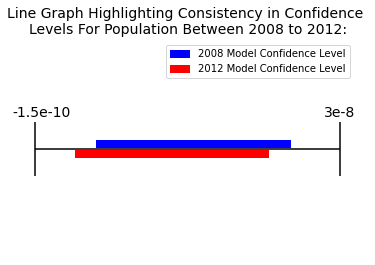

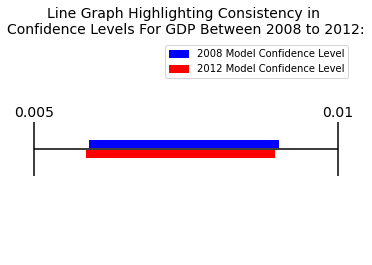

In [4]:
n = 71
p = 2
alpha = 0.05
t_critical = scipy.stats.t.ppf(1 - alpha / 2, n - p - 1)
estimate08pop = regress2008.params[1]
sterr08pop = regress2008.bse[1]
estimate12pop = regress2012.params[1]
sterr12pop = regress2012.bse[1]
estimate08GDP = regress2008.params[2]
sterr08GDP = regress2008.bse[2]
estimate12GDP = regress2012.params[2]
sterr12GDP = regress2012.bse[2]
interval_min08pop = estimate08pop - t_critical*sterr08pop
interval_max08pop = estimate08pop + t_critical*sterr08pop
interval_min12pop = estimate12pop - t_critical*sterr12pop
interval_max12pop = estimate12pop + t_critical*sterr12pop
interval_min08GDP = estimate08GDP - t_critical*sterr08GDP
interval_max08GDP = estimate08GDP + t_critical*sterr08GDP
interval_min12GDP = estimate12GDP - t_critical*sterr12GDP
interval_max12GDP = estimate12GDP + t_critical*sterr12GDP
print('2008 regression model Min (Population):',round(interval_min08pop,11))
print('2008 regression model Max (Population):',round(interval_max08pop,10))
print('2012 regression model Min (Population):',round(interval_min12pop,11))
print('2012 regression model Max (Population):',round(interval_max12pop,10))
print('2008 regression model Min (GDP):',round(interval_min08GDP,11))
print('2008 regression model Max (GDP):',round(interval_max08GDP,10))
print('2012 regression model Min (GDP):',round(interval_min12GDP,11))
print('2012 regression model Max (GDP):',round(interval_max12GDP,10))
xmin = -15*10**-9
xmax = 3*10**-8
y = 0
height = 0.5
plt.ylim(-1,1)
plt.hlines(y, xmin, xmax,'k')
plt.vlines(xmin, y - height / 2., y + height / 2.,'k')
plt.vlines(xmax, y - height / 2., y + height / 2.,'k')
plt.hlines(y+0.045, -5.971480750717483e-09, 2.284112948027229e-08,'b',linewidth=8,label='2008 Model Confidence Level')
plt.hlines(y-0.045, -9.105934441984404e-09, 1.9599434407558272e-08,'r',linewidth=8,label='2012 Model Confidence Level')
plt.axis('off')
plt.title('Line Graph Highlighting Consistency in Confidence \nLevels For Population Between 2008 to 2012:',fontsize=14)
plt.legend()
plt.text(xmin*0.65, 0.3, '-1.5e-10', horizontalalignment='right',fontsize=14)
plt.text(xmax*0.92, 0.3, '3e-8', horizontalalignment='left',fontsize=14)
plt.show()
xmin = 0.0053
xmax = 0.01
y = 0
height = 0.5
plt.ylim(-1,1)
plt.hlines(y, xmin, xmax,'k')
plt.vlines(xmin, y - height / 2., y + height / 2.,'k')
plt.vlines(xmax, y - height / 2., y + height / 2.,'k')
plt.hlines(y+0.045, 0.00614591192, 0.009080358,'b',linewidth=8,label='2008 Model Confidence Level')
plt.hlines(y-0.045, 0.00610231906, 0.0090258431,'r',linewidth=8,label='2012 Model Confidence Level')
plt.axis('off')
plt.title('Line Graph Highlighting Consistency in \nConfidence Levels For GDP Between 2008 to 2012:',fontsize=14)
plt.legend()
plt.text(xmin*1.06, 0.3, '0.005', horizontalalignment='right',fontsize=14)
plt.text(xmax*0.975, 0.3, '0.01', horizontalalignment='left',fontsize=14)
plt.show()

From the graphs above it is clear that the effects of populaiton and GDP over time remain consistent as the confidence levels are extremly similar between the two models.


# Q3 Using the regression for the 2012 medal count make a prediction for the results of 2016. (1 mark)
# +
# Q4 Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation of the axes to make it these clearer. How good are the predictions? Which countries are outliers from the trend? (1 mark)

## These two questions are done together.

## Prediction with regression model trained on GDP, population and **previous peformance**.

Regression results when trained on Population and GDP and Previous Preformance:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Medals   No. Observations:                   71
Model:                            GLM   Df Residuals:                       67
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          21.808
Method:                          IRLS   Log-Likelihood:                -208.11
Date:                Wed, 08 Mar 2023   Deviance:                       1461.1
Time:                        16:25:44   Pearson chi2:                 1.46e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

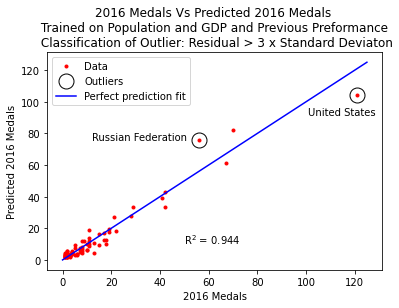

In [5]:
# Creating a regression model that uses previous preformance as well as population and GDP.
df2012Q3 = pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population'],'GDP': medalsdf['GDP'],'PrevMedal': medalsdf['Medal2008']})
formula2012Q3 = 'Medals ~ Population + GDP + PrevMedal'
regress2012Q3 = glm(formula2012Q3, df2012Q3).fit()
print('Regression results when trained on Population and GDP and Previous Preformance:')
print(regress2012Q3.summary())

predictions_P_G_08 = {'Population':medalsdf['Population'],'GDP':medalsdf['GDP'],'PrevMedal':medalsdf['Medal2012']} # Finding the predicted values of medals from the model above
predictionsQ3 = regress2012Q3.predict(predictions_P_G_08)

residuals_1 = predictionsQ3 - medalsdf['Medal2016'] # Finding the R^2 value
residuals_1_squared = sum(residuals_1**2)
mean_y1 = np.mean(medalsdf['Medal2016'])
sum_y_meany_squared1 = sum((medalsdf['Medal2016'] - mean_y1)**2)
R21 = 1 - (residuals_1_squared/sum_y_meany_squared1)
print('R squared value:',R21)

std_residuals1 = np.std(residuals_1) # Finding outliers
outliers1 = []
outliers1_actual = []
outliers1_country = []
for i in range(len(residuals_1)):
    if np.abs(residuals_1[i]) > 3*std_residuals1:
        outliers1.append(predictionsQ3[i])
        outliers1_actual.append(medalsdf['Medal2016'][i])
        outliers1_country.append(medalsdf['Country'][i])
                                            
x=np.linspace(0,125,5)
plt.plot(medalsdf['Medal2016'],predictionsQ3,'r.',label='Data')
plt.plot(outliers1_actual,outliers1, 'o',ms= 15, mec='black', mfc='none', mew=1, label='Outliers')
plt.plot(x,x,'b',label='Perfect prediction fit')
plt.annotate('Russian Federation',xy=(outliers1_actual[0],outliers1[0]),xytext=(outliers1_actual[0]- 44,outliers1[0]))
plt.annotate('United States',xy=(outliers1_actual[1],outliers1[1]),xytext=(outliers1_actual[1]-20,outliers1[1]-13))
plt.annotate('$\mathregular{R^{2}}$ = 0.944',xy=(60,60),xytext=(50,10))
plt.title('2016 Medals Vs Predicted 2016 Medals \n Trained on Population and GDP and Previous Preformance \n Classification of Outlier: Residual > 3 x Standard Deviaton')
plt.ylabel('Predicted 2016 Medals'),plt.xlabel('2016 Medals'),plt.legend()
plt.show()
# Data frame of countries, 2016 medals and predicted 2016 medals:
predictdf = pd.DataFrame({'Country':medalsdf['Country'],'2016 Predictions':round(predictionsQ3),'Medals 2016':medalsdf['Medal2016']}) 

The prediction using the regression model trained on GDP, population and previous preformance had an R^2 value of 0.944 showing the prediction model was accurate. Outliers in this model were the Russian Federation and The United States. For a country to be an outlier its residual value must be greater than 3 standard deviations of residual values.

## Prediction with regression model trained on **only** GDP and population.

R squared value: 0.7788645678069965


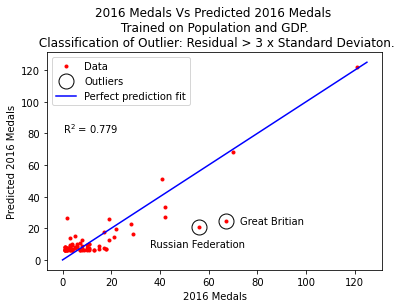

In [6]:
predictions_P_G = {'Population':medalsdf['Population'],'GDP':medalsdf['GDP']} # Finding the predicted values of medals form the regression model in Q2
predictionsQ3_wrong = regress2012.predict(predictions_P_G)

residuals_2 = predictionsQ3_wrong - medalsdf['Medal2016'] # calcualting the R^2 value
residuals_2_squared = sum(residuals_2**2)
mean_y2 = np.mean(medalsdf['Medal2016'])
sum_y_meany_squared2 = sum((medalsdf['Medal2016'] - mean_y2)**2)
R22 = 1 - (residuals_2_squared/sum_y_meany_squared2)
print('R squared value:',R22)

std_residuals2 = np.std(residuals_2) # Finding outliers
outliers2 = []
outliers2_actual = []
outliers2_country = []
for i in range(len(residuals_2)):
    if np.abs(residuals_2[i]) > 3*std_residuals2:
        outliers2.append(predictionsQ3_wrong[i])
        outliers2_actual.append(medalsdf['Medal2016'][i])
        outliers2_country.append(medalsdf['Country'][i])

x=np.linspace(0,125,5)
plt.plot(medalsdf['Medal2016'],predictionsQ3_wrong,'r.',label = 'Data')   
plt.plot(outliers2_actual,outliers2, 'o',ms= 15, mec='black', mfc='none', mew=1, label='Outliers')
plt.plot(x,x,'b',label='Perfect prediction fit')
plt.annotate('Great Britian',xy=(outliers2_actual[0],outliers2[0]),xytext=(outliers2_actual[0]+6,outliers2[0]-2))
plt.annotate('Russian Federation',xy=(outliers2_actual[1],outliers2[1]),xytext=(outliers2_actual[1]-20,outliers2[1]-13))
plt.annotate('$\mathregular{R^{2}}$ = 0.779',xy=(60,60),xytext=(0,80))
plt.title('2016 Medals Vs Predicted 2016 Medals \n Trained on Population and GDP. \n Classification of Outlier: Residual > 3 x Standard Deviaton.')
plt.ylabel('Predicted 2016 Medals'),plt.xlabel('2016 Medals'),plt.legend()
plt.show()
# Data frame of countries, 2016 medals and predicted 2016 medals
predictdf_wrong = pd.DataFrame({'Country':medalsdf['Country'],'2016 Predictions':round(predictionsQ3_wrong),'Medals 2016':medalsdf['Medal2016']})

The prediction using the regression model trained on GDP and population had an R^2 value of 0.779 showing the prediction model was considerably less accurate than the previous model . Outliers in this model were the Great Britian and Russian Federation. For a country to be an outlier its residual value must be greater than 3 standard deviations of residual values. 

## Bar charts of predicted medals for 2016 from both models are shown below:

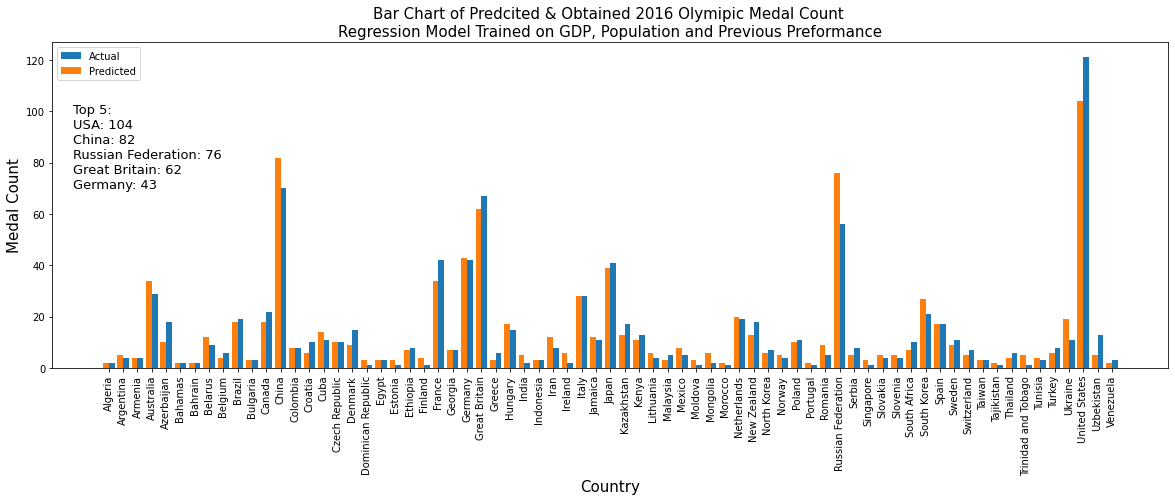

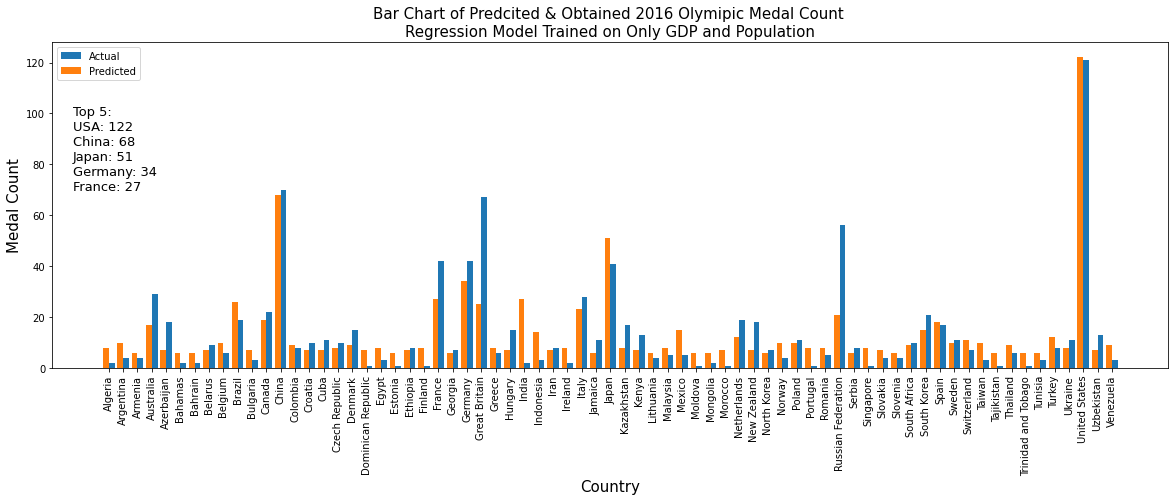

In [7]:
plt.figure(figsize=(20,6))
plt.bar(np.linspace(0,70,71)+0.2,medalsdf['Medal2016'],label='Actual',width=0.4)
plt.bar(np.linspace(0,70,71)-0.2,predictdf['2016 Predictions'],label='Predicted',width=0.4)
plt.ylabel('Medal Count',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.title('Bar Chart of Predcited & Obtained 2016 Olymipic Medal Count \nRegression Model Trained on GDP, Population and Previous Preformance',fontsize=15)
plt.annotate('Top 5: \nUSA: 104 \nChina: 82 \nRussian Federation: 76 \nGreat Britain: 62 \nGermany: 43',xy=(69,104),xytext=(-2.5,70),fontsize=13)
plt.xticks(np.linspace(0,70,71),medalsdf['Country'],rotation='vertical')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.bar(np.linspace(0,70,71)+0.2,medalsdf['Medal2016'],label='Actual',width=0.4)
plt.bar(np.linspace(0,70,71)-0.2,predictdf_wrong['2016 Predictions'],label='Predicted',width=0.4)
plt.ylabel('Medal Count',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.title('Bar Chart of Predcited & Obtained 2016 Olymipic Medal Count \nRegression Model Trained on Only GDP and Population',fontsize=15)
plt.xticks(np.linspace(0,70,71),medalsdf['Country'],rotation='vertical')
plt.annotate('Top 5: \nUSA: 122 \nChina: 68 \nJapan: 51 \nGermany: 34 \nFrance: 27',xy=(69,104),xytext=(-2.5,70),fontsize=13)
plt.legend()
plt.show()

# Q5. Fit linear regressions models for the total medal count in 2012 and select the model that minimises the Akaike Information Criterion.
# (i) Population alone;

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Medals   No. Observations:                   71
Model:                            GLM   Df Residuals:                       69
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          334.46
Method:                          IRLS   Log-Likelihood:                -306.07
Date:                Wed, 08 Mar 2023   Deviance:                       23077.
Time:                        16:25:46   Pearson chi2:                 2.31e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2012
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3225      2.295      4.498      0.0

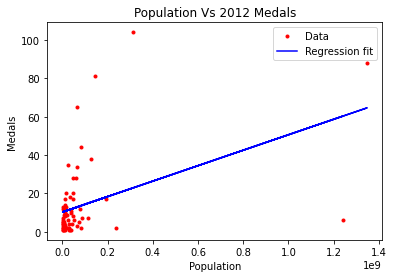

Akaike Information Criterion for regression model using population alone: 616.1484076872775


In [8]:
df2012pop = pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population']})
formula2012pop = 'Medals ~ Population'
regress2012pop = glm(formula2012pop, df2012pop).fit()
print(regress2012pop.summary())

plt.plot(medalsdf['Population'],medalsdf['Medal2012'],'r.',label='Data')
plt.plot(medalsdf['Population'],regress2012pop.params[1] * medalsdf['Population'] +  regress2012pop.params[0],'b',label='Regression fit')
plt.title('Population Vs 2012 Medals'),plt.xlabel('Population'),plt.ylabel('Medals'),plt.legend()
plt.show()
AIC_pop = regress2012pop.aic
print(f'Akaike Information Criterion for regression model using population alone: {AIC_pop}')

# (ii) GDP alone;

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Medals   No. Observations:                   71
Model:                            GLM   Df Residuals:                       69
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          131.26
Method:                          IRLS   Log-Likelihood:                -272.87
Date:                Wed, 08 Mar 2023   Deviance:                       9056.9
Time:                        16:25:47   Pearson chi2:                 9.06e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8746
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2360      1.479      4.217      0.0

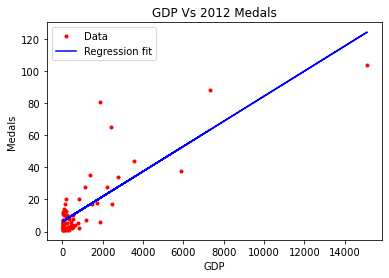

Akaike Information Criterion for regression model using GDP alone: 549.7403906680169


In [9]:
df2012GDP = pd.DataFrame({'Medals': medalsdf['Medal2012'],'GDP': medalsdf['GDP']})
formula2012GDP = 'Medals ~ GDP'
regress2012GDP = glm(formula2012GDP, df2012GDP).fit()
print(regress2012GDP.summary())

plt.plot(medalsdf['GDP'],medalsdf['Medal2012'],'r.',label='Data')
plt.plot(medalsdf['GDP'],regress2012GDP.params[1] * medalsdf['GDP'] +  regress2012GDP.params[0],'b',label='Regression fit')
plt.title('GDP Vs 2012 Medals'),plt.xlabel('GDP'),plt.ylabel('Medals'),plt.legend()
plt.show()
AIC_GDP = regress2012GDP.aic
print(f'Akaike Information Criterion for regression model using GDP alone: {AIC_GDP}')

# (iii) Population and GDP;

In [10]:
print(regress2012.summary())
AIC_pop_GDP = regress2012.aic
print(f'Akaike Information Criterion for regression model using GDP and population: {AIC_pop_GDP}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Medals   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          132.16
Method:                          IRLS   Log-Likelihood:                -272.59
Date:                Wed, 08 Mar 2023   Deviance:                       8986.6
Time:                        16:25:47   Pearson chi2:                 8.99e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8738
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0761      1.500      4.051      0.0

# Other Combinations of Population, GDP and Previous Preformance;
### Other combiations include GDP + population + previous preformance, GDP + previous preformance, population + previous preformance and only previous preformance.

In [11]:
AIC_GDP_pop_prev = regress2012Q3.aic
print(f'Akaike Information Criterion for regression model using GDP, population and previous preformance: {AIC_GDP_pop_prev}')

df2012pop_prev = pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population'],'PrevMedal': medalsdf['Medal2008']})
formula2012pop_prev = 'Medals ~ Population + PrevMedal'
regress2012pop_prev = glm(formula2012pop_prev, df2012pop_prev).fit()
AIC_pop_prev = regress2012pop_prev.aic
print(f'Akaike Information Criterion for regression model using population and previous preformance: {AIC_pop_prev}')

df2012GDP_prev = pd.DataFrame({'Medals': medalsdf['Medal2012'],'GDP': medalsdf['GDP'],'PrevMedal': medalsdf['Medal2008']})
formula2012GDP_prev = 'Medals ~ GDP + PrevMedal'
regress2012GDP_prev = glm(formula2012GDP_prev, df2012GDP_prev).fit()
AIC_GDP_prev = regress2012GDP_prev.aic
print(f'Akaike Information Criterion for regression model using GDP and previous preformance: {AIC_GDP_prev}')

df2012_prev = pd.DataFrame({'Medals': medalsdf['Medal2012'],'PrevMedal': medalsdf['Medal2008']})
formula2012_prev = 'Medals ~ PrevMedal'
regress2012_prev = glm(formula2012_prev, df2012_prev).fit()
AIC_prev = regress2012_prev.aic
print(f'Akaike Information Criterion for regression model using only previous preformance: {AIC_prev}')

Akaike Information Criterion for regression model using GDP, population and previous preformance: 424.2129305019236
Akaike Information Criterion for regression model using population and previous preformance: 423.9943679141655
Akaike Information Criterion for regression model using GDP and previous preformance: 422.93565925639865
Akaike Information Criterion for regression model using only previous preformance: 422.36742440447694


Table of AIC values:

|Regression Model                       |AIC Value 2.d.p.|
|---------------------------------------|----------------|
|Population                             |616.15          |
|GDP                                    |549.74          |
|Previous Preformance                   |422.37          |
|Population + GDP                       |551.19          |
|Population + Previous Preformance      |423.99          |
|GDP + Previous Preformance             |422.94          |  
|Population + GDP + Previous Preformance|424.21          |  

Therefore the model that minimises the AIC is the regression model using only previous preformance, narrowly followed by the other models that also consider previous preforamnce. The poorest fit is the regression model that only uses Population.

# Q6. Use cross-validation to perform a model selection between regression models from Q5. Does your result agree with the model selected by AIC? 

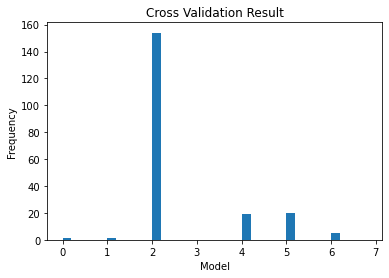

Cross validation ranks the models in the following order:
1. Previous Preformance
2. GDP + Previous Preformance
3. Population + Previous Preformance
4. Population + GDP + Previous Preformance
5. GDP
6. Population


In [12]:
formula = ['Medals ~ Population','Medals ~ GDP','Medals ~ PrevMedal','Medals ~ GDP + Population','Medals ~ Population + PrevMedal','Medals ~ GDP + PrevMedal','Medals ~ Population + GDP + PrevMedal']
winner = []
rep = 200
for j in range(rep):

    train_data, test_data = train_test_split(df2012Q3, test_size=0.5) 
    predictive_log_likelihood = []
    for i in formula:
        current_model = glm(i, train_data).fit()
        sigma = np.sqrt(current_model.scale)
        ypredict_mean = current_model.predict(test_data)
        ypredict_meandf=pd.DataFrame({'ypredict_mean': ypredict_mean})
        predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['Medals']],loc = ypredict_meandf[['ypredict_mean']] , scale = sigma )))
    winner.append(np.argmax(predictive_log_likelihood))
ModelNumber = np.arange(0,7,0.2)
plt.hist(winner,bins=ModelNumber)
plt.xlabel("Model")
plt.ylabel("Frequency")
plt.title('Cross Validation Result')
plt.show()
{'Model 0': 'Population',
'Model 1': 'GDP',
'Model 2': 'Previous Preformance',
'Model 3': 'GDP + Population',
'Model 4': 'Population + Previous Preformance',
'Model 5': 'GDP + Previous Preformance',
'Model 6': 'Population + GDP + Previous Preformance'}

data = Counter(winner)
occurances = list(data.most_common(len(data)))
rankings = []
models = ['Population','GDP','Previous Preformance','GDP + Population','Population + Previous Preformance','GDP + Previous Preformance','Population + GDP + Previous Preformance']
for i in range(len(occurances)):
    rankings.append(models[occurances[i][0]])
print('Cross validation ranks the models in the following order:')
for i in range(len(rankings)):
    print(f'{i+1}. {rankings[i]}')
    

(if a model never gets selected by the cross validation method it is not listed above)

**Compared to the order from the AIC method:**
1) Previous preformance.
2) Previous preformance + GDP.
3) Previous Preformance + Population.
4) Population + GDP + Previous Preformance.
5) GDP.
6) Population + GDP
7) Population

**Both AIC and cross validation find the best model to be the one trained on only previous preformance**

# Q7. Using the three fitted models from Q5, predict the results of Rio 2016. Which predicts best? Compare this result with earlier answers. (1 mark)

Regression Model: Medals ~ Population
R squared value: 0.11976420690016187


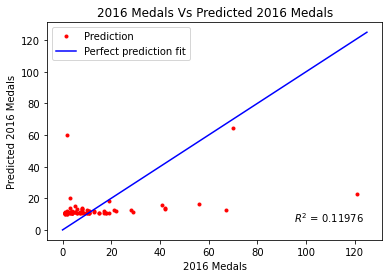

Regression Model: Medals ~ GDP
R squared value: 0.7886759722849112


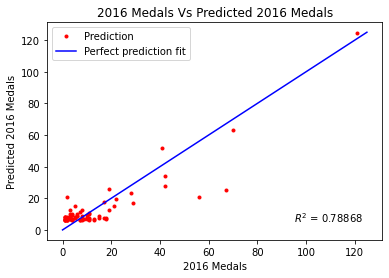

Regression Model: Medals ~ PrevMedal
R squared value: 0.9301199373225401


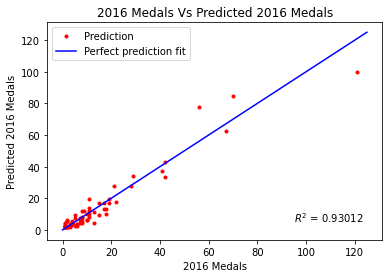

Regression Model: Medals ~ GDP + Population
R squared value: 0.778864567808522


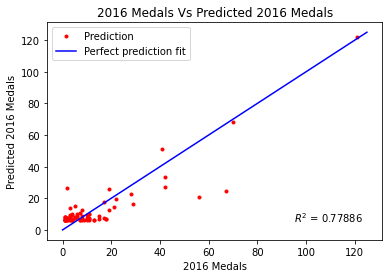

Regression Model: Medals ~ Population + PrevMedal
R squared value: 0.9321335279621701


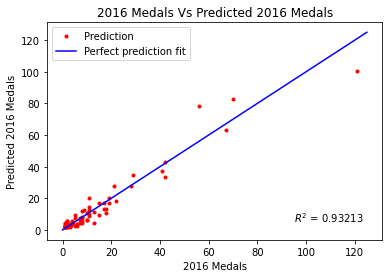

Regression Model: Medals ~ GDP + PrevMedal
R squared value: 0.9400925730305977


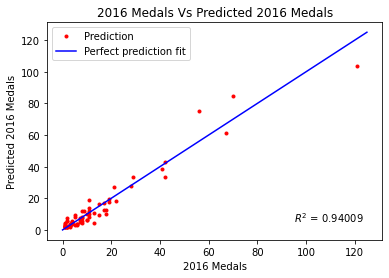

Regression Model: Medals ~ Population + GDP + PrevMedal
R squared value: 0.9442851063748111


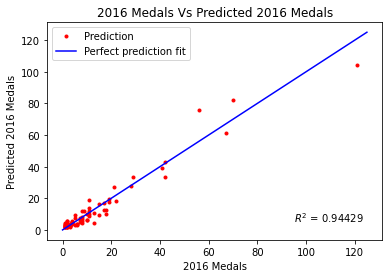

In [13]:
dfs_all_models = [pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population']}),
                  pd.DataFrame({'Medals': medalsdf['Medal2012'],'GDP': medalsdf['GDP']}),
                  pd.DataFrame({'Medals': medalsdf['Medal2012'],'PrevMedal': medalsdf['Medal2008']}),
                  pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population'],'GDP': medalsdf['GDP']}),
                  pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population'],'PrevMedal': medalsdf['Medal2008']}),
                  pd.DataFrame({'Medals': medalsdf['Medal2012'],'GDP': medalsdf['GDP'],'PrevMedal': medalsdf['Medal2008']}),
                  pd.DataFrame({'Medals': medalsdf['Medal2012'],'Population': medalsdf['Population'],'GDP': medalsdf['GDP'],'PrevMedal': medalsdf['Medal2008']})]
formula = ['Medals ~ Population','Medals ~ GDP','Medals ~ PrevMedal','Medals ~ GDP + Population',
           'Medals ~ Population + PrevMedal','Medals ~ GDP + PrevMedal','Medals ~ Population + GDP + PrevMedal']
all_predictions = [{'Population':medalsdf['Population']},
                   {'GDP':medalsdf['GDP']},
                   {'PrevMedal':medalsdf['Medal2012']},
                   {'Population':medalsdf['Population'],'GDP':medalsdf['GDP']},
                   {'Population':medalsdf['Population'],'PrevMedal':medalsdf['Medal2012']},
                   {'GDP':medalsdf['GDP'],'PrevMedal':medalsdf['Medal2012']},
                   {'Population':medalsdf['Population'],'GDP':medalsdf['GDP'],'PrevMedal':medalsdf['Medal2012']}]
for i in range(len(dfs_all_models)):
    print(f'Regression Model: {formula[i]}')
    GLMs =(glm(formula[i], dfs_all_models[i]).fit())
    predictions = GLMs.predict(all_predictions[i])
   
    residuals = predictions - medalsdf['Medal2016'] # Finding the R^2 value
    residuals_squared = sum(residuals**2)
    mean_y = np.mean(medalsdf['Medal2016'])
    sum_y_meany_squared = sum((medalsdf['Medal2016'] - mean_y)**2)
    R2 = 1 - (residuals_squared/sum_y_meany_squared)
    print('R squared value:',R2)
    
    x=np.linspace(0,125,5)
    plt.plot(medalsdf['Medal2016'],predictions,'r.',label='Prediction')
    plt.plot(x,x,'b',label='Perfect prediction fit')
    plt.annotate(f'$R^{2}$ = {round(R2,5)}',xy=(60,60),xytext=(95,5))
    plt.title('2016 Medals Vs Predicted 2016 Medals')
    plt.ylabel('Predicted 2016 Medals'),plt.xlabel('2016 Medals'),plt.legend()
    plt.show()

The model that predicts best is the model trained on population, GDP and previous preformance. This model had an R^2 value of 0.944. The other values of R^2 are shown in the table below. All models that trained on previous preformance recorded a high R^2 value. The least accurate prediction was produced by the model trained only on population which had an R^2 of 0.120. It is worth notcing that the model with the greatest $R^2$ value didnt rank first in cross validation and AIC rankings as it has three variables (more than any other) so is penalised for this.

|Regression Model| $R^2$ Value|
|-|-|
|Population|0.11976|
|GDP|0.78868|
|Previous Preformance|0.93012|
|GDP + Population|0.77886|
|Population + Previous Preformance|0.93213|
|GDP + Previous Preformance|0.94009|
|Population + GDP + Previous Preformance|0.94429|

# Additional Work: Predicting 2024 medals using data given and 2020 olympic medal count.

2020 medal count found on olympic website and copied into an array. The following regression model is trained on 2012 and 2008 medals to fit the 2016 medal. It is then used to predict 2024 medals using 2020 and 2016 medals. This means the model takes into consideration the previous two preformances (The model wasnt trained on all previous preformances as otherwise training data would be used as test data).

Regression results when trained on previous preformance of the last 2 Olympics:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Medals   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          27.212
Method:                          IRLS   Log-Likelihood:                -216.49
Date:                Wed, 08 Mar 2023   Deviance:                       1850.4
Time:                        16:25:59   Pearson chi2:                 1.85e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

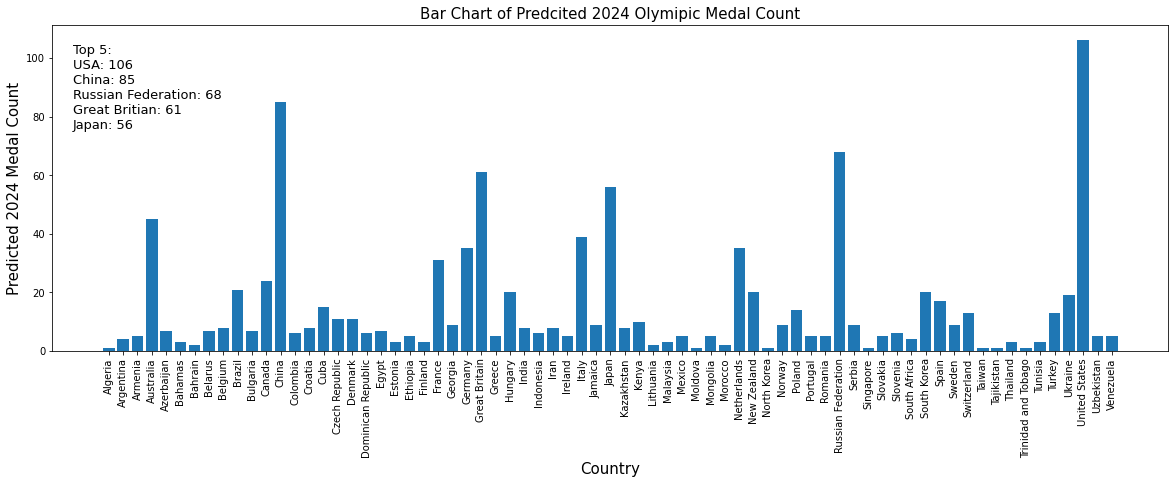

In [14]:
Medal2020 = [0,3,4,46,7,2,1,7,7,21,6,24,89,5,8,15,11,11,5,6,2,4,2,33,8,37,64,4,20,7,5,7,4,40,9,58,8,10,1,2,4,0,4,1,36,20,0,8,14,4,4,71,9,0,4,5,3,20,17,9,13,0,0,2,0,2,13,19,113,5,4]
additionaldf = pd.DataFrame({'Medals':medalsdf['Medal2016'],'PrevMedal':medalsdf['Medal2012'],'TwoPrevMedal':medalsdf['Medal2008']})
additional_formula = 'Medals ~ PrevMedal + TwoPrevMedal'
regress_additional = glm(additional_formula, additionaldf).fit()
print('Regression results when trained on previous preformance of the last 2 Olympics:')
print(regress_additional.summary())

predictions_additional_args = {'PrevMedal':Medal2020,'TwoPrevMedal':medalsdf['Medal2016']} 
predictions_additional = regress_additional.predict(predictions_additional_args)
predictions_2024 = pd.DataFrame({'Country':medalsdf['Country'],'2024 Predictions':round(predictions_additional)})

plt.figure(figsize=(20,6))
plt.bar(np.linspace(0,70,71),predictions_2024['2024 Predictions'])
plt.ylabel('Predicted 2024 Medal Count',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.title('Bar Chart of Predcited 2024 Olymipic Medal Count',fontsize=15)
plt.xticks(np.linspace(0,70,71),predictions_2024['Country'],rotation='vertical')
plt.annotate('Top 5: \nUSA: 106 \nChina: 85 \nRussian Federation: 68 \nGreat Britian: 61 \nJapan: 56',xy=(69,104),xytext=(-2.5,76),fontsize=13)
plt.show()

This regression model preidcts that the United States of America will win the olympics with 106 medals, followed by China and the Russian Federation.

# Self Assessment:
**Q1.** I sucessfully preformed linear regression to predict the medal count in 2012 and 2008 using both GDP and Population. (1/1)

**Q2.** I sucessfully compared the effects of population and GDP over time in predicting medal counts by comparing coeiffecents and confidence levels. (1/1)

**Q3.** I sucessfully predicted the 2016 medals and presented them in a bar chart. (1/1)

**Q4.** I sucessfully plotted my predictions, highlighted outliers and evaluated the sucessfullness of my results. (1/1)

**Q5.** I sucessfully fitted linear regression models for the 2012 medal count using all combinations of GDP, population and previous preformance. I then found each models AIC value and compared the models. (1/1)

**Q6.** I sucessfully cross validated all models and comapred the model preferences to the AIC values. (1/1)

**Q7.** I sucessfully predicted 2016 medals for all the models in Q5 and presented my results in table and graph form. (1/1)

**Q8.** I belive my work is neatly presented and code well written and documented. I utilsied markdown cells to present findings in a clear way. (2/2)

**Q9.** For the extra mark I: Predicted 2016 medals in Q3 + 4 for models using GDP + population and GDP + population + previous preformance and graphically showed my predictions outliers and $R^2$ value for both. For Q5 instead of the 3 models suggested I did 7 (all combinations of GDP, population and previous preformance). Q6 and Q7 I did for all 7 models from Q5 rather than the three suggested. Finally I found the 2020 medal count and used this to predict the 2024 olymipc medal count. (1/1) 

Overall: (10/10)

All work is my own.